In [1]:
import os
data_file_path = "data/"

dir_list = os.listdir(data_file_path)

In [2]:
dir_list_by_parameter = list(map(lambda x: x.split(":"), dir_list))

# dir_list_by_parameter[0]
# ['g_16000', 'p_10', 'wc_10', 'gs_42', 'ss_10', 'ipmutp_0.01', 'icmutp_0.005', 'icmaxsw_5', 'ccmutp_0.01.csv']
VARIABLE_A_INDEX = 8
VARIABLE_B_INDEX = 3

# extract unique numbers (ipmutp) and seeds
unique_ip_mut = set()
unique_seeds = set()
for i in range(len(dir_list_by_parameter)):
  unique_ip_mut.add(dir_list_by_parameter[i][VARIABLE_A_INDEX].split("_")[1])
  unique_seeds.add(dir_list_by_parameter[i][4].split("_")[1])

print(f"{len(unique_ip_mut)}, {len(unique_seeds)}")

15, 40


In [3]:
import pandas as pd

max_iters = 1500

fdf = pd.DataFrame()
for file in dir_list:
  ip_mut = float(file.replace(".csv", "").split(":")[VARIABLE_A_INDEX].split("_")[1])
  gseed = float(file.replace(".csv", "").split(":")[VARIABLE_B_INDEX].split("_")[1])
  seed = int(file.split(":")[4].split("_")[1])
  
  if seed not in [1]:
    continue
  
  df = pd.read_csv(f"{data_file_path}/{file}")
  df.rename(columns={'Unnamed: 0': 'generation'}, inplace=True)
  df['seed'] = [seed for _ in range(len(df))]
  df['ip_mut'] = [ip_mut for _ in range(len(df))]
  df['gseed'] = [gseed for _ in range(len(df))]
  fdf = pd.concat((fdf, df[:max_iters]))

fdf.describe()

,generation,per_it_avg_total_length,per_it_avg_max_path_length,per_it_avg_fitness,per_it_best_fitness,seed,ip_mut,gseed
count,112500.00000,112500.000000,112500.000000,112500.000000,112500.000000,112500.0,112500.000000,112500.00000
mean,749.50000,36942.189003,5372.032792,36942.189003,32986.868922,1.0,0.097067,44.00000
std,433.01453,7282.746398,1397.499269,7282.746398,6795.311589,0.0,0.093369,1.41422
min,0.00000,17558.883478,1485.469328,17558.883478,17450.957144,1.0,0.001000,42.00000
25%,374.75000,34141.544485,4386.930437,34141.544485,30381.329154,1.0,0.008000,43.00000
50%,749.50000,38504.994062,5259.773789,38504.994062,34330.336588,1.0,0.080000,44.00000
75%,1124.25000,41423.425065,6251.845424,41423.425065,37159.929451,1.0,0.160000,45.00000
max,1499.00000,63075.056550,14022.441428,63075.056550,57327.245614,1.0,0.300000,46.00000


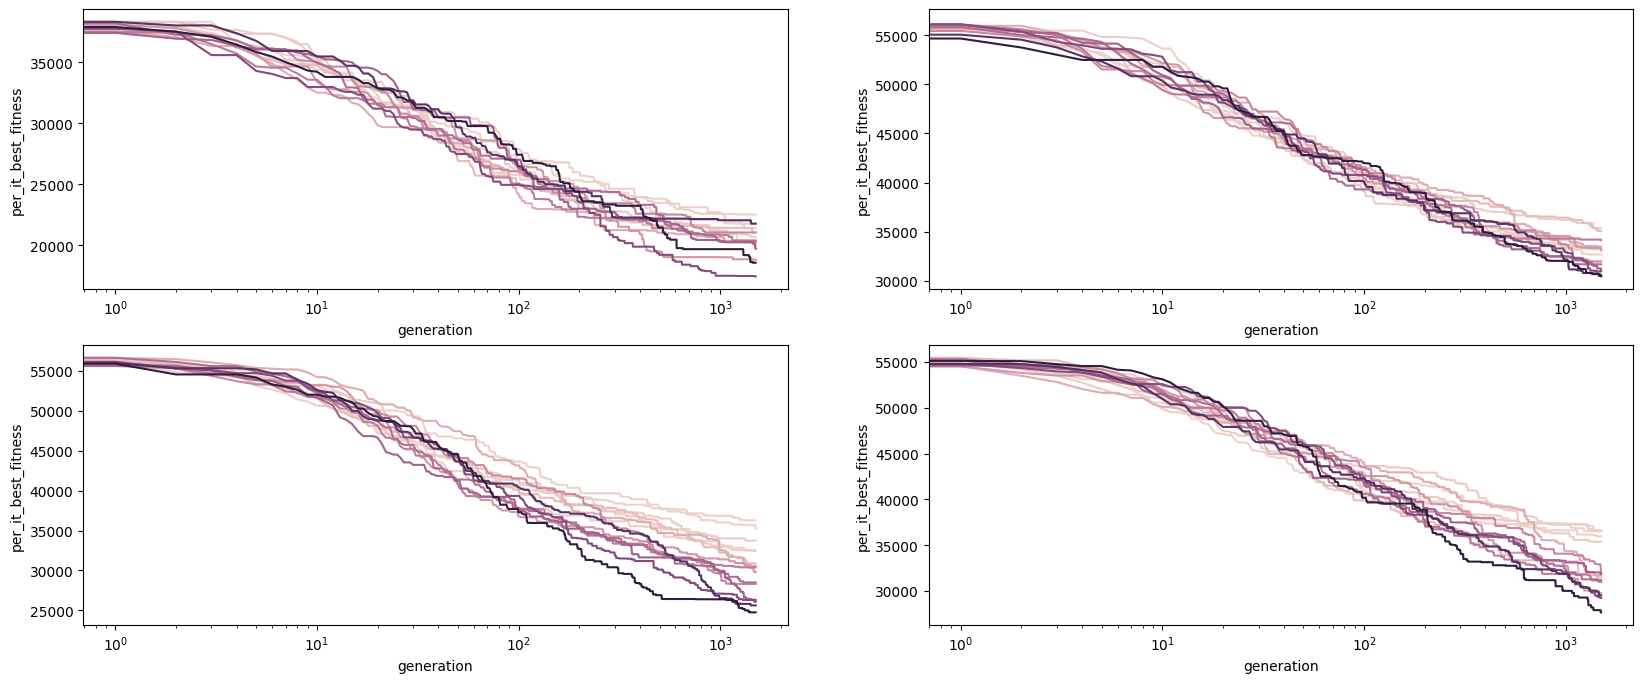

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import duckdb

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))

cfdf_43 = duckdb.sql("SELECT * FROM fdf WHERE gseed = 43").df()
cfdf_44 = duckdb.sql("SELECT * FROM fdf WHERE gseed = 44").df()
cfdf_45 = duckdb.sql("SELECT * FROM fdf WHERE gseed = 45").df()
cfdf_46 = duckdb.sql("SELECT * FROM fdf WHERE gseed = 46").df()

ax = sns.lineplot(ax=axs[0][0], data=cfdf_43, x="generation", y="per_it_best_fitness", hue="ip_mut", legend=False)
ax.set(xscale="log")
ax = sns.lineplot(ax=axs[0][1], data=cfdf_44, x="generation", y="per_it_best_fitness", hue="ip_mut", legend=False)
ax.set(xscale="log")
ax = sns.lineplot(ax=axs[1][0], data=cfdf_45, x="generation", y="per_it_best_fitness", hue="ip_mut", legend=False)
ax.set(xscale="log")
ax = sns.lineplot(ax=axs[1][1], data=cfdf_46, x="generation", y="per_it_best_fitness", hue="ip_mut", legend=False)
ax.set(xscale="log")

fig.savefig("konvergencna_krivka.png") 


In [5]:
import numpy as np

max_iters = 250

fdf2 = pd.DataFrame()

probs = np.array([0.001, 0.002, 0.005, 0.008, 0.01, 0.03, 0.05, 0.08, 0.1, 0.12, 0.14, 0.16, 0.20, 0.25, 0.3])

for file in dir_list:
  ip_mut = round(float(file.replace(".csv", "").split(":")[VARIABLE_A_INDEX].split("_")[1]), 3)
  gseed = float(file.replace(".csv", "").split(":")[VARIABLE_B_INDEX].split("_")[1])
  seed = int(file.replace(".csv", "").split(":")[4].split("_")[1])

  df = pd.read_csv(f"{data_file_path}/{file}")
  df.rename(columns={'Unnamed: 0': 'generation'}, inplace=True)
  df['seed'] = [seed for _ in range(len(df))]
  df['gseed'] = [gseed for _ in range(len(df))]
  df['ic_mut'] = [ip_mut for _ in range(len(df))]
  cdf = df[df['generation'] == max_iters]
  
  fdf2 = pd.concat((fdf2, cdf))

fdf2.describe()

,generation,per_it_avg_total_length,per_it_avg_max_path_length,per_it_avg_fitness,per_it_best_fitness,seed,gseed,ic_mut
count,3000.0,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,250.0,39021.412190,5505.172615,39021.412190,35238.552795,20.500000,44.000000,0.097067
std,0.0,7075.505642,1469.550763,7075.505642,6365.072592,11.545321,1.414449,0.093384
min,250.0,20453.845166,1910.079995,20453.845166,19423.097535,1.000000,42.000000,0.001000
25%,250.0,38024.755315,4458.560581,38024.755315,34490.622314,10.750000,43.000000,0.008000
50%,250.0,41195.140221,5372.846123,41195.140221,37654.854673,20.500000,44.000000,0.080000
75%,250.0,43543.232621,6426.862083,43543.232621,39433.243444,30.250000,45.000000,0.160000
max,250.0,53037.874866,12138.003509,53037.874866,45667.147532,40.000000,46.000000,0.300000


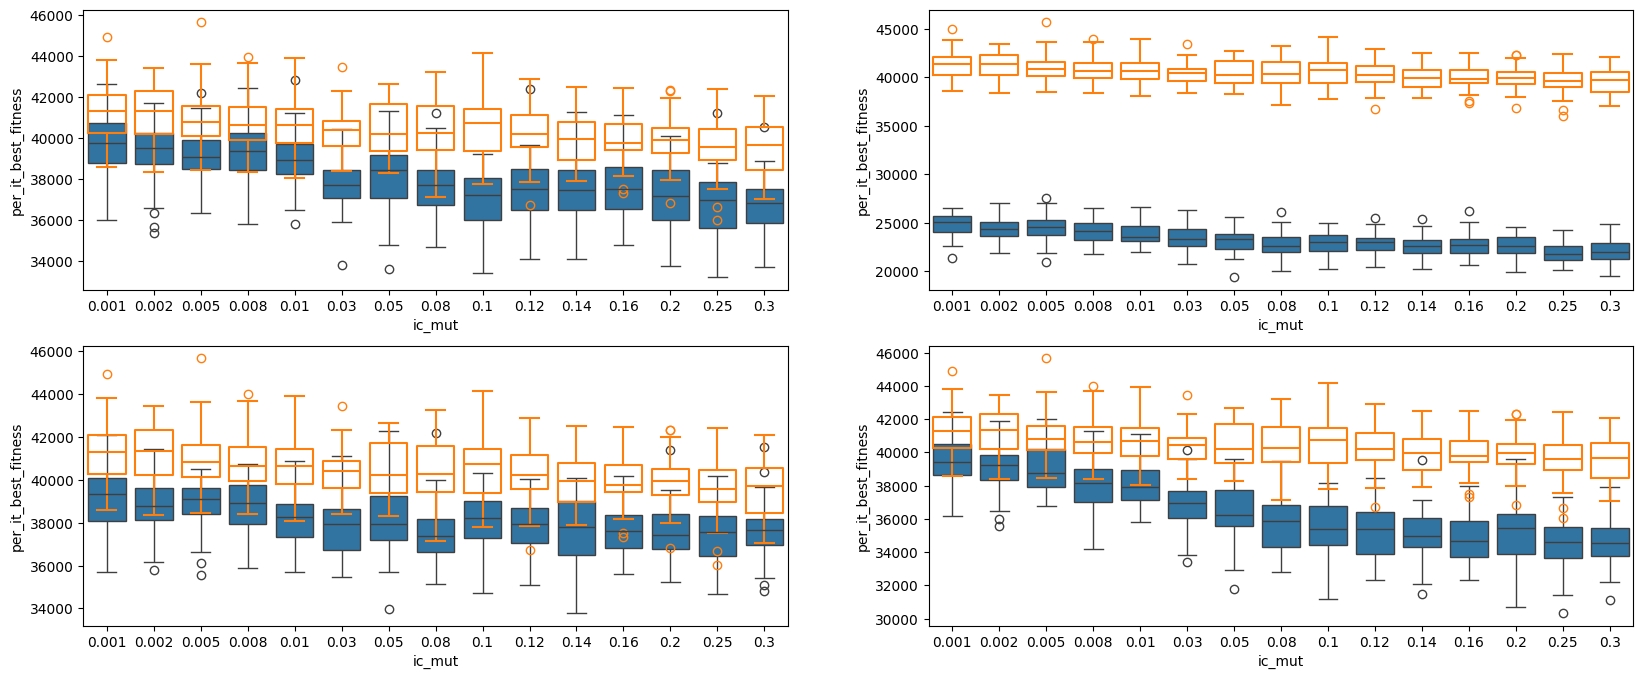

In [6]:
import duckdb

gsd42 = duckdb.sql("SELECT * FROM fdf2 WHERE gseed = 42").df()
gsd43 = duckdb.sql("SELECT * FROM fdf2 WHERE gseed = 43").df()
gsd44 = duckdb.sql("SELECT * FROM fdf2 WHERE gseed = 44").df()
gsd45 = duckdb.sql("SELECT * FROM fdf2 WHERE gseed = 45").df()
gsd46 = duckdb.sql("SELECT * FROM fdf2 WHERE gseed = 46").df()


fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))

sns.boxplot(ax=axs[0][1], data=gsd43, x="ic_mut", y="per_it_best_fitness")
sns.boxplot(ax=axs[1][0], data=gsd44, x="ic_mut", y="per_it_best_fitness")
sns.boxplot(ax=axs[1][1], data=gsd45, x="ic_mut", y="per_it_best_fitness")
sns.boxplot(ax=axs[0][0], data=gsd46, x="ic_mut", y="per_it_best_fitness")

sns.boxplot(ax=axs[0][0], data=gsd42, x="ic_mut", y="per_it_best_fitness", saturation=0.2, fill=False)
sns.boxplot(ax=axs[0][1], data=gsd42, x="ic_mut", y="per_it_best_fitness", saturation=0.2, fill=False)
sns.boxplot(ax=axs[1][0], data=gsd42, x="ic_mut", y="per_it_best_fitness", saturation=0.2, fill=False)
sns.boxplot(ax=axs[1][1], data=gsd42, x="ic_mut", y="per_it_best_fitness", saturation=0.2, fill=False)

plt.show()

fig.savefig("boxplot_start.png") 

In [7]:
import numpy as np

max_iters = 1499

fdf2 = pd.DataFrame()

probs = np.array([0.001, 0.002, 0.005, 0.008, 0.01, 0.03, 0.05, 0.08, 0.1, 0.12, 0.14, 0.16, 0.20, 0.25, 0.3])
# ic_swap_qs = np.array([2, 3, 4, 5])

for file in dir_list:
  ip_mut = round(float(file.replace(".csv", "").split(":")[VARIABLE_A_INDEX].split("_")[1]), 3)
  gseed = float(file.replace(".csv", "").split(":")[VARIABLE_B_INDEX].split("_")[1])
  seed = int(file.replace(".csv", "").split(":")[4].split("_")[1])
    
  df = pd.read_csv(f"{data_file_path}/{file}")
  df.rename(columns={'Unnamed: 0': 'generation'}, inplace=True)
  df['seed'] = [seed for _ in range(len(df))]
  df['gseed'] = [gseed for _ in range(len(df))]
  df['ic_mut'] = [ip_mut for _ in range(len(df))]
  cdf = df[df['generation'] == max_iters]
  
  fdf2 = pd.concat((fdf2, cdf))

fdf2.describe()

,generation,per_it_avg_total_length,per_it_avg_max_path_length,per_it_avg_fitness,per_it_best_fitness,seed,gseed,ic_mut
count,3000.0,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1499.0,34537.123467,5246.256077,34537.123467,30320.249272,20.500000,44.000000,0.097067
std,0.0,6523.342616,1439.957273,6523.342616,5945.180984,11.545321,1.414449,0.093384
min,1499.0,17123.716766,1546.714587,17123.716766,15298.664828,1.000000,42.000000,0.001000
25%,1499.0,31761.665451,4231.994263,31761.665451,27239.127406,10.750000,43.000000,0.008000
50%,1499.0,36442.763918,5124.325528,36442.763918,32048.736469,20.500000,44.000000,0.080000
75%,1499.0,39117.471088,6199.905198,39117.471088,34886.261918,30.250000,45.000000,0.160000
max,1499.0,49717.437704,12348.700581,49717.437704,40600.037180,40.000000,46.000000,0.300000


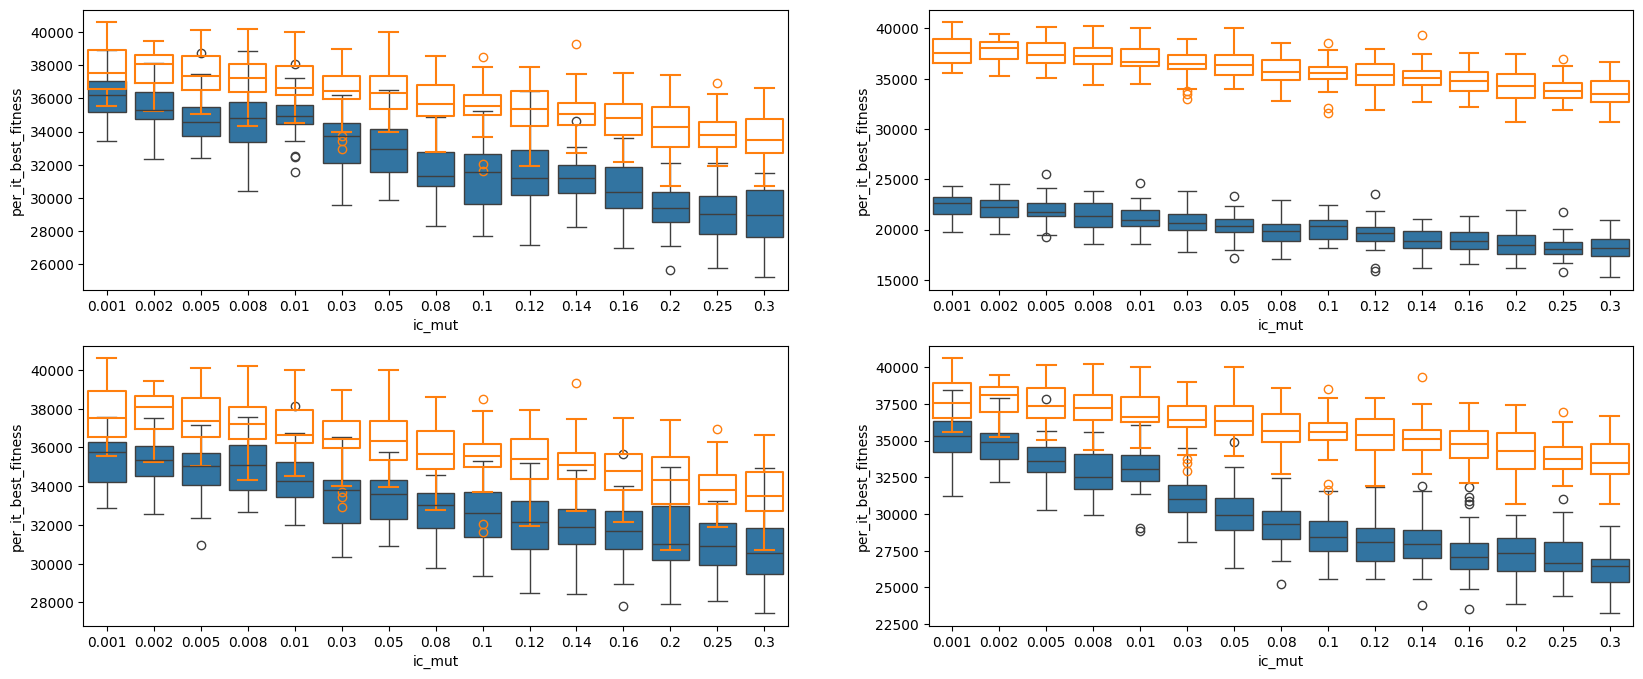

In [8]:
import duckdb

gsd42 = duckdb.sql("SELECT * FROM fdf2 WHERE gseed = 42").df()
gsd43 = duckdb.sql("SELECT * FROM fdf2 WHERE gseed = 43").df()
gsd44 = duckdb.sql("SELECT * FROM fdf2 WHERE gseed = 44").df()
gsd45 = duckdb.sql("SELECT * FROM fdf2 WHERE gseed = 45").df()
gsd46 = duckdb.sql("SELECT * FROM fdf2 WHERE gseed = 46").df()


fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))

sns.boxplot(ax=axs[0][1], data=gsd43, x="ic_mut", y="per_it_best_fitness")
sns.boxplot(ax=axs[1][0], data=gsd44, x="ic_mut", y="per_it_best_fitness")
sns.boxplot(ax=axs[1][1], data=gsd45, x="ic_mut", y="per_it_best_fitness")
sns.boxplot(ax=axs[0][0], data=gsd46, x="ic_mut", y="per_it_best_fitness")

sns.boxplot(ax=axs[0][0], data=gsd42, x="ic_mut", y="per_it_best_fitness", saturation=0.2, fill=False)
sns.boxplot(ax=axs[0][1], data=gsd42, x="ic_mut", y="per_it_best_fitness", saturation=0.2, fill=False)
sns.boxplot(ax=axs[1][0], data=gsd42, x="ic_mut", y="per_it_best_fitness", saturation=0.2, fill=False)
sns.boxplot(ax=axs[1][1], data=gsd42, x="ic_mut", y="per_it_best_fitness", saturation=0.2, fill=False)

plt.show()

fig.savefig("boxplot_end.png") 